In [1]:
import pandas as pd
import matplotlib.pyplot as plt 


In [2]:
df = pd.read_excel('../data/egatur_total_españa.xlsx')

In [3]:
df.head()

,AÑO,MES,TIPO_VISITANTE,PERNOCTACIONES,GASTO_TOTAL
0,2015,10,Turista no residente (no tránsito),58846,6.134141e+09
1,2015,11,Turista no residente (no tránsito),61720,3.764707e+09
2,2015,12,Turista no residente (no tránsito),76994,3.678380e+09
3,2016,1,Turista no residente (no tránsito),60931,3.607937e+09
4,2016,2,Turista no residente (no tránsito),53764,3.622012e+09


In [4]:
df.describe()

,AÑO,MES,PERNOCTACIONES,GASTO_TOTAL
count,97.000000,97.000000,97.000000,9.700000e+01
mean,2019.350515,6.680412,63452.649485,6.047929e+09
std,2.419716,3.528297,14680.416714,3.163597e+09
min,2015.000000,1.000000,17702.000000,1.187516e+08
25%,2017.000000,4.000000,54052.000000,4.125504e+09
50%,2019.000000,7.000000,61117.000000,5.475405e+09
75%,2021.000000,10.000000,70985.000000,8.120745e+09
max,2023.000000,12.000000,112187.000000,1.322450e+10


In [5]:
df.isnull().sum()

AÑO               0
MES               0
TIPO_VISITANTE    0
PERNOCTACIONES    0
GASTO_TOTAL       0
dtype: int64

In [6]:
visitante_tipo = df['TIPO_VISITANTE'].unique()
visitante_tipo

array(['Turista no residente (no tránsito)'], dtype=object)

In [7]:
df1 = df.drop('TIPO_VISITANTE', axis=1)
df1.head()

,AÑO,MES,PERNOCTACIONES,GASTO_TOTAL
0,2015,10,58846,6.134141e+09
1,2015,11,61720,3.764707e+09
2,2015,12,76994,3.678380e+09
3,2016,1,60931,3.607937e+09
4,2016,2,53764,3.622012e+09


In [8]:

df1['AÑO'] = df1['AÑO'].astype(str)

# Convertir 'MES' a string y asegurarse de que tenga dos dígitos
df1['MES'] = df1['MES'].astype(str).str.zfill(2)

# Crear una nueva columna 'AÑO_MES' concatenando 'AÑO' y 'MES'
df1['FECHA'] = df1['AÑO'] + "-" + df1['MES']


In [9]:
df1 = df1.drop(['AÑO', 'MES'], axis=1)

In [10]:

print(df1.head())

   PERNOCTACIONES   GASTO_TOTAL    FECHA
0           58846  6.134141e+09  2015-10
1           61720  3.764707e+09  2015-11
2           76994  3.678380e+09  2015-12
3           60931  3.607937e+09  2016-01
4           53764  3.622012e+09  2016-02


In [11]:
df1['FECHA'] = pd.to_datetime(df1['FECHA'], format='%Y-%m')

# Establecer la columna 'FECHA' como el índice del DataFrame
df1.set_index('FECHA', inplace=True)

# Mostrar las primeras filas para verificar los cambios
print(df1.head())

            PERNOCTACIONES   GASTO_TOTAL
FECHA                                   
2015-10-01           58846  6.134141e+09
2015-11-01           61720  3.764707e+09
2015-12-01           76994  3.678380e+09
2016-01-01           60931  3.607937e+09
2016-02-01           53764  3.622012e+09


In [ ]:
# df1['FECHA_STR'] = df1['FECHA'].dt.strftime('%Y-%m')
# Este código crea una nueva columna, FECHA_STR, que contiene la representación en cadena de texto de la fecha en el formato año-mes, 
# utilizando strftime('%Y-%m') para formatear las fechas.

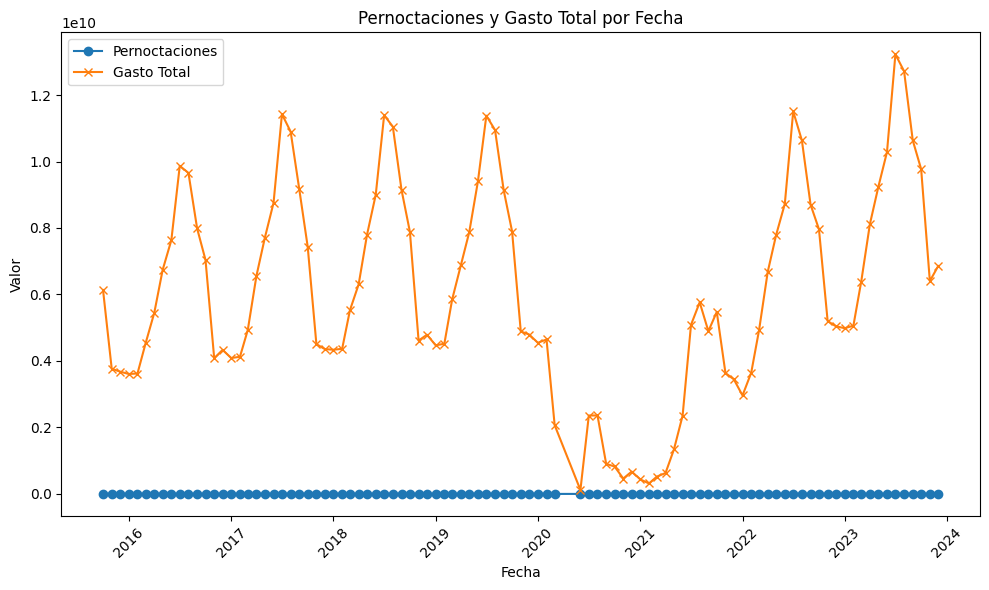

In [12]:
# Asegúrate de que 'FECHA' sea el índice si aún no lo es
# df1.set_index('FECHA', inplace=True)  # Solo si FECHA aún no es el índice

# Crear un lineplot para "PERNOCTACIONES" y "GASTO_TOTAL"
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico como prefieras

# Dibujar la línea para "PERNOCTACIONES"
plt.plot(df1.index, df1['PERNOCTACIONES'], label='Pernoctaciones', marker='o')

# Dibujar la línea para "GASTO_TOTAL"
plt.plot(df1.index, df1['GASTO_TOTAL'], label='Gasto Total', marker='x')

# Añadir leyenda para distinguir las líneas
plt.legend()

# Añadir título y etiquetas para los ejes
plt.title('Pernoctaciones y Gasto Total por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Valor')

# Mejorar la disposición y mostrar el gráfico
plt.xticks(rotation=45)  # Rota las etiquetas del eje X para mejorar la legibilidad
plt.tight_layout()
plt.show()

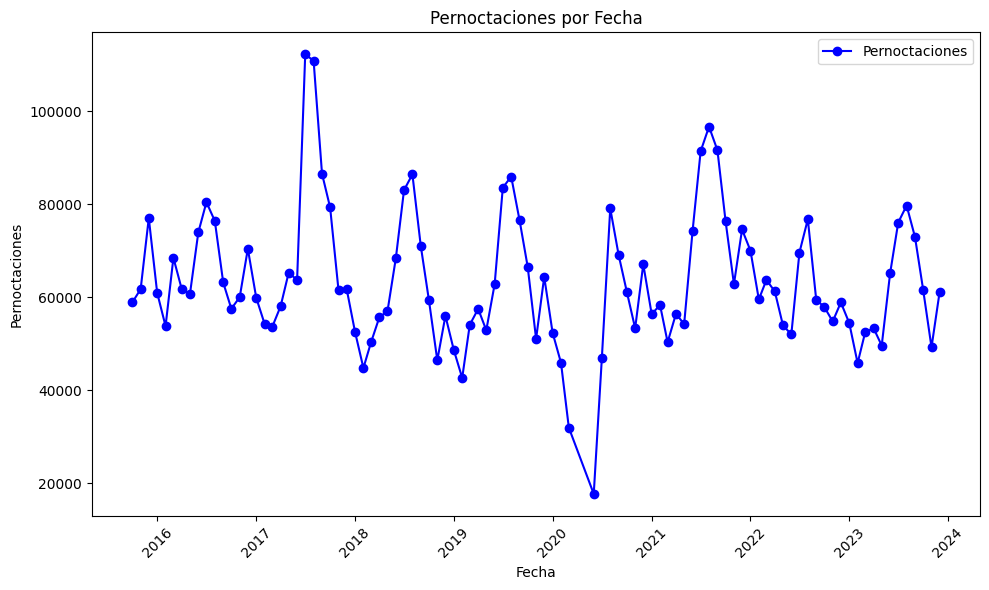

In [13]:
# Gráfico para "PERNOCTACIONES"
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico como prefieras
plt.plot(df1.index, df1['PERNOCTACIONES'], label='Pernoctaciones', marker='o', color='blue')
plt.title('Pernoctaciones por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Pernoctaciones')
plt.xticks(rotation=45)  # Rota las etiquetas del eje X para mejorar la legibilidad
plt.legend()
plt.tight_layout()
plt.show()


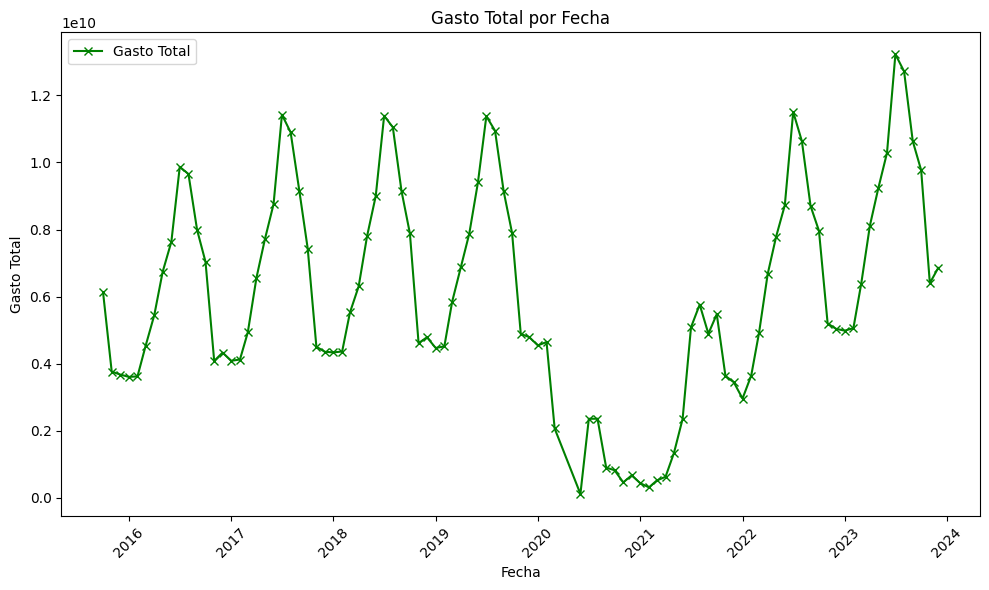

In [14]:
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico como prefieras
plt.plot(df1.index, df1['GASTO_TOTAL'], label='Gasto Total', marker='x', color='green')
plt.title('Gasto Total por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Gasto Total')
plt.xticks(rotation=45)  # Rota las etiquetas del eje X para mejorar la legibilidad
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Para visualizar la evolución de "PERNOCTACIONES" y "GASTO_TOTAL" en el mismo gráfico y facilitar su comparación, 
# especialmente cuando hay grandes diferencias en sus escalas de valores, una opción efectiva es utilizar dos ejes Y distintos: 
# uno para cada conjunto de datos. Esto te permite mantener la escala original de cada conjunto de datos sin necesidad de recurrir 
# a una escala logarítmica, aunque la escala logarítmica también es una opción viable en ciertos contextos.

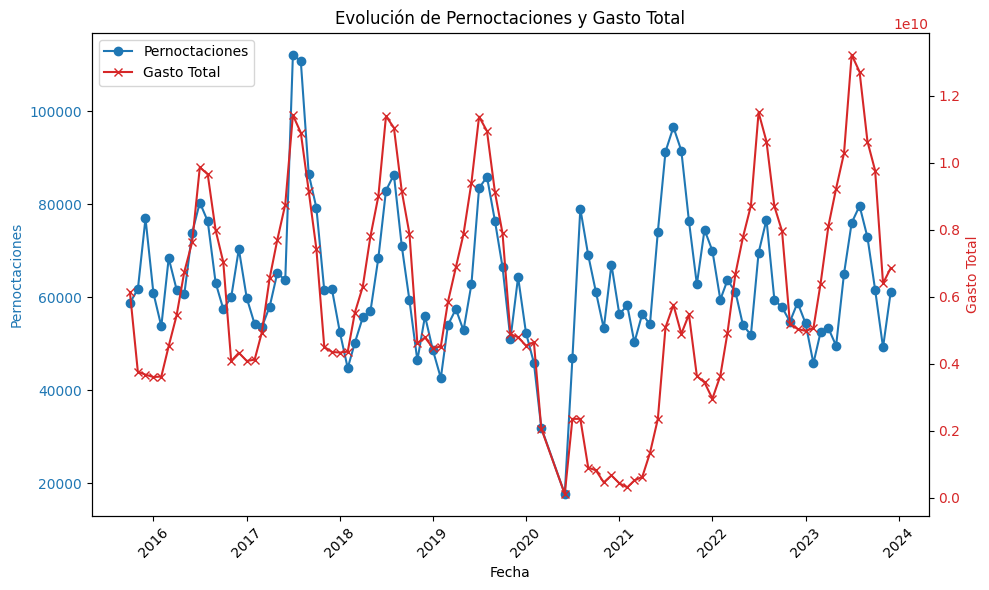

In [15]:
#Crear figura y eje principal
fig, ax1 = plt.subplots(figsize=(10, 6))

# Dibujar "PERNOCTACIONES" en el eje Y principal
color = 'tab:blue'
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Pernoctaciones', color=color)
ax1.plot(df1.index, df1['PERNOCTACIONES'], color=color, marker='o', label='Pernoctaciones')
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)  # Rota las etiquetas del eje X para mejorar la legibilidad

# Crear un segundo eje Y que comparte el mismo eje X
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Gasto Total', color=color)
ax2.plot(df1.index, df1['GASTO_TOTAL'], color=color, marker='x', label='Gasto Total')
ax2.tick_params(axis='y', labelcolor=color)

# Añadir título y mejorar disposición
plt.title('Evolución de Pernoctaciones y Gasto Total')
fig.tight_layout()

# Añadir leyenda
# La leyenda puede ser un poco más compleja debido a los dos ejes Y, así que se pueden añadir manualmente
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

ML - Probamos con SARIMA


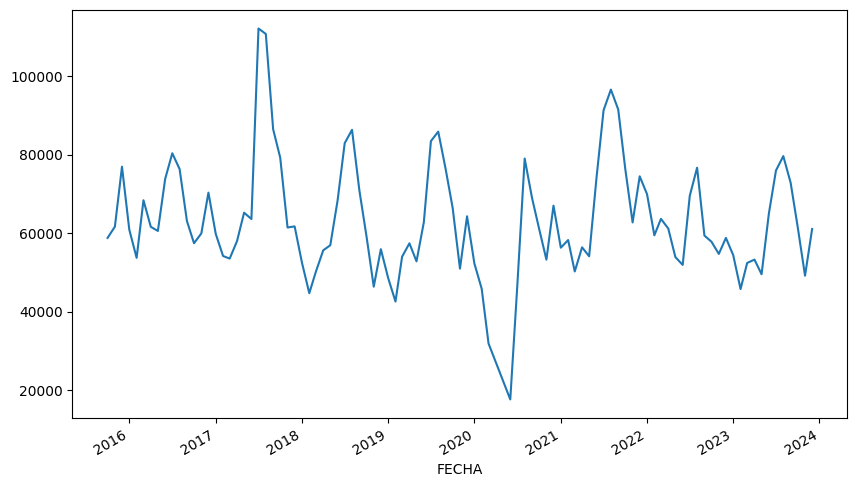

In [16]:
df1['PERNOCTACIONES'].plot(figsize=(10,6))
plt.show()

In [27]:
# from statsmodels.tsa.stattools import adfuller
# result = adfuller(df1['PERNOCTACIONES'])
# print('ADF Statistic:', result[0])
# print('p-value:', result[1])

# Si p-value > 0.05, la serie no es estacionaria y es necesario diferenciar.

ADF Statistic: -2.492201543603817
p-value: 0.11738332204415497


Interpretación:
Estadística ADF: Este valor se compara con los valores críticos para el test (por ejemplo, -3.5, -2.9, y -2.6 para los niveles de confianza del 1%, 5%, y 10%, respectivamente, aunque estos valores pueden variar ligeramente dependiendo del tamaño de la muestra). Un valor más negativo que el valor crítico sugiere que podemos rechazar la hipótesis nula (H0) de que hay una raíz unitaria presente (es decir, la serie es no estacionaria).

p-valor: Indica la probabilidad de obtener resultados de prueba al menos tan extremos como los resultados observados, bajo la hipótesis nula. Un p-valor bajo (típicamente ≤ 0.05) indica que puedes rechazar la hipótesis nula y, por lo tanto, asumir que tu serie es estacionaria.

Conclusión para los datos:
Dado que p-valor es 0.11738332204415497, que es mayor que el umbral común de 0.05, no puedes rechazar la hipótesis nula. Esto sugiere que tu serie "PERNOCTACIONES" tiene una raíz unitaria y, por lo tanto, no es estacionaria.

Pasos siguientes:
Para proceder con el modelado SARIMA, necesitas transformar tu serie temporal para hacerla estacionaria. Esto generalmente implica diferenciar la serie una o más veces hasta que la estacionariedad sea alcanzada. Aquí te muestro cómo diferenciar tu serie y realizar nuevamente el test ADF:

In [29]:
# # # Diferenciar la serie
# df1['PERNOCTACIONES_diff'] = df1['PERNOCTACIONES'].diff().dropna()

# # # Realizar nuevamente el test ADF en la serie diferenciada
# result_diff = adfuller(df1['PERNOCTACIONES_diff'].dropna())
# print('ADF Statistic:', result_diff[0])
# print('p-value:', result_diff[1])


ADF Statistic: -3.5758364011337243
p-value: 0.006240146526702754


Con los nuevos resultados del test de Dickey-Fuller aumentado (ADF) después de diferenciar la serie "PERNOCTACIONES", observamos que:

Estadística ADF: -3.5758364011337243
p-valor: 0.006240146526702754
Interpretación:
La Estadística ADF es más negativa que los valores críticos comunes para niveles de confianza del 1%, 5%, y 10%, lo que indica que la serie diferenciada es estacionaria con un nivel de confianza significativo.

El p-valor es sustancialmente menor que 0.05, lo que te permite rechazar la hipótesis nula de que la serie tiene una raíz unitaria. En otras palabras, la serie diferenciada es estacionaria.

Conclusión:
Después de diferenciar, tu serie "PERNOCTACIONES" ahora parece ser estacionaria, lo que la hace adecuada para modelar con SARIMA. El siguiente paso es identificar los parámetros óptimos para tu modelo SARIMA, considerando tanto los componentes estacionales como los no estacionales de la serie.

Identificación de Parámetros SARIMA:
Para identificar los parámetros SARIMA (p, d, q)(P, D, Q)[S]:

Ya has determinado que d=1 es adecuado, ya que una diferenciación hizo que la serie fuera estacionaria.
Deberás identificar los otros parámetros basándote en los gráficos ACF (Autocorrelation Function) y PACF (Partial Autocorrelation Function) de tu serie diferenciada.
El componente estacional [S] debe ser identificado según la periodicidad de tus datos. Por ejemplo, si tus datos son mensuales y muestran estacionalidad anual, entonces S=12.
Ejemplo de Ajuste de Modelo SARIMA:
Supongamos que, después de analizar los gráficos ACF y PACF, decides que los parámetros son (p, d, q) = (1, 1, 1) para la parte no estacional del modelo, y (P, D, Q)[S] = (1, 1, 1)[12] para la parte estacional. Aquí está cómo ajustarías el modelo:

In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ajustar el modelo SARIMA con los parámetros identificados
model = SARIMAX(df1['PERNOCTACIONES'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Imprimir el resumen del modelo
print(results.summary())

# Para hacer predicciones futuras, puedes usar:
predicciones = results.forecast(steps=24) # Predecir los próximos 24 meses

c:\Users\Borja BOOTCAMP\onedrive\VIRTUAL_ENVS\CF_ML\ML_CF\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Borja BOOTCAMP\onedrive\VIRTUAL_ENVS\CF_ML\ML_CF\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                     PERNOCTACIONES   No. Observations:                   97
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -903.971
Date:                            Sun, 11 Feb 2024   AIC                           1817.941
Time:                                    11:57:59   BIC                           1830.095
Sample:                                         0   HQIC                          1822.827
                                             - 97                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7471      0.297      2.519      0.012       0.166       1.328
ma.L1         -0.8773      0.229   

c:\Users\Borja BOOTCAMP\onedrive\VIRTUAL_ENVS\CF_ML\ML_CF\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Borja BOOTCAMP\onedrive\VIRTUAL_ENVS\CF_ML\ML_CF\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Los resultados de tu modelo SARIMAX para la serie "PERNOCTACIONES" muestran varios aspectos importantes:

Parámetros del Modelo
Los coeficientes para ar.L1 y ma.L1 son significativos (p < 0.05), indicando que tanto el componente autoregresivo como el de medias móviles de la parte no estacional del modelo contribuyen significativamente a explicar la variabilidad en las pernoctaciones.
En la parte estacional, ma.S.L12 es significativo, lo que sugiere que el componente de medias móviles estacional es relevante para el modelo. Sin embargo, el coeficiente ar.S.L12 no es estadísticamente significativo (p > 0.05), indicando que el efecto autoregresivo estacional podría no ser necesario.
Estadísticas del Modelo
AIC (Akaike Information Criterion) y BIC (Bayesian Information Criterion) proporcionan una medida de la calidad del modelo en relación con otros modelos. Cuanto más bajos sean estos valores, mejor será el modelo en términos de equilibrio entre ajuste y complejidad.
El Log Likelihood indica la log-verosimilitud del modelo; los valores más altos indican un mejor ajuste.
Pruebas Diagnósticas
Ljung-Box (Q) y Jarque-Bera (JB) son pruebas para la autocorrelación y normalidad de los residuos, respectivamente. Un p-valor alto en la prueba Ljung-Box sugiere que no hay autocorrelación significativa en los residuos, lo cual es bueno. Sin embargo, el p-valor bajo en la prueba de Jarque-Bera indica que los residuos no siguen una distribución normal.
Heteroskedasticity (H) verifica la homogeneidad de la varianza de los residuos. Un p-valor bajo sugiere la presencia de heteroscedasticidad.
Advertencias
La advertencia sobre la matriz de covarianza indica que puede haber inestabilidad en los errores estándar de los coeficientes. Esto puede deberse a la singularidad o casi singularidad de la matriz de covarianza, lo que sugiere que el modelo puede ser sobreparametrizado o que hay multicolinealidad entre las variables.
Siguientes Pasos
Considera simplificar el modelo eliminando el componente ar.S.L12 dado su p-valor y revisando otros modelos con diferentes combinaciones de parámetros para comparar los criterios AIC/BIC.
Revisa los diagnósticos de los residuos más detalladamente, incluyendo gráficos de residuos, para asegurarte de que no hay patrones no capturados por el modelo.
Para futuras predicciones, asegúrate de evaluar el rendimiento del modelo en un conjunto de datos de prueba o mediante validación cruzada, si es posible.
Este análisis inicial ofrece una buena base para comenzar a refinar tu modelo y explorar alternativas para mejorar el ajuste y la precisión de tus predicciones.

Por otro lado,Los warnings indican que el índice de fecha de tu DataFrame tiene asociado no tiene información de frecuencia, lo cual es necesario para realizar pronósticos con modelos de series temporales como SARIMA en statsmodels. Para solucionar esto, debes asegurarte de que tu índice de fecha tenga una frecuencia definida, usando por ejemplo df.index = pd.date_range(start='fecha_inicio', periods=len(df), freq='F') donde 'F' es la frecuencia adecuada para tus datos (e.g., 'M' para mensual, 'D' para diario).

In [24]:
print(df1.index)

DatetimeIndex(['2015-10-01', '2015-11-01', '2015-12-01', '2016-01-01',
               '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01',
               '2016-06-01', '2016-07-01', '2016-08-01', '2016-09-01',
               '2016-10-01', '2016-11-01', '2016-12-01', '2017-01-01',
               '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01',
               '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01',
               '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01',
               '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01',
               '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01',
               '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01',
               '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01',
               '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01',
               '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-06-01', '2020-07-01',
      

En mi caso, el primero dato que tengo en el index es 2015-10 y el último 2023-12. Así pues modifico el código:

In [25]:
df1.index = pd.date_range(start='2015-10', periods=len(df), freq='M')

Vuelvo a introducir el código anterior para obtener los resultados sin los warnings sobre el índice temporal

In [26]:
model = SARIMAX(df1['PERNOCTACIONES'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Imprimir el resumen del modelo
print(results.summary())

# Para hacer predicciones futuras, puedes usar:
predicciones = results.forecast(steps=24) # Predecir los próximos 24 meses

                                     SARIMAX Results                                      
Dep. Variable:                     PERNOCTACIONES   No. Observations:                   97
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -903.971
Date:                            Sun, 11 Feb 2024   AIC                           1817.941
Time:                                    12:13:34   BIC                           1830.095
Sample:                                10-31-2015   HQIC                          1822.827
                                     - 10-31-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7471      0.297      2.519      0.012       0.166       1.328
ma.L1         -0.8773      0.229   

Estos warnings son comunes cuando se ajusta un modelo SARIMAX en series temporales complejas. Indican problemas potenciales con la precisión de las estimaciones de los parámetros debido a la matriz de covarianza. Aunque no necesariamente invalidan tu modelo, sí sugieren que debes proceder con cautela al interpretar los coeficientes y sus intervalos de confianza. Considera revisar la especificación del modelo, como ajustar los órdenes de ARIMA o simplificar el modelo, para ver si mejora la estabilidad de las estimaciones.

Sin duda los valores atípicos durante la crisis del covid son los que afectan a la calidad del modelo. Para corregirlo hay varias opciones, pero voy a optar por introducir un "elemento exógeno" en forma de variable que influya directamente en cómo entrenamos el modelo.

In [37]:
# Suponiendo que df es tu DataFrame y 'impacto_covid' es la columna binaria que has creado
df1['impacto_covid'] = [1 if '2020-04' <= str(index) <= '2020-11' else 0 for index in df1.index]


model = SARIMAX(df1['PERNOCTACIONES'], exog=df1[['impacto_covid']], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Imprimir el resumen del modelo
print(results.summary())

# Hacer predicciones futuras considerando la variable exógena
# Suponiendo que tienes un DataFrame futuro_df para predicciones que también incluye la columna 'impacto_covid'
# future_predictions = results.get_forecast(steps=24, exog=futuro_df[['impacto_covid']])


                                     SARIMAX Results                                      
Dep. Variable:                     PERNOCTACIONES   No. Observations:                   97
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -902.017
Date:                            Sun, 11 Feb 2024   AIC                           1816.034
Time:                                    12:31:16   BIC                           1830.619
Sample:                                10-31-2015   HQIC                          1821.897
                                     - 10-31-2023                                         
Covariance Type:                              opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
impacto_covid -1.261e+04   8503.230     -1.483      0.138   -2.93e+04    4054.525
ar.L1             0.7153  

In [38]:
df1

,PERNOCTACIONES,GASTO_TOTAL,impacto_covid
2015-10-31,58846,6.134141e+09,0
2015-11-30,61720,3.764707e+09,0
2015-12-31,76994,3.678380e+09,0
2016-01-31,60931,3.607937e+09,0
2016-02-29,53764,3.622012e+09,0
...,...,...,...
2023-06-30,79687,1.271625e+10,0
2023-07-31,72909,1.063514e+10,0
2023-08-31,61624,9.769557e+09,0
2023-09-30,49223,6.403578e+09,0


In [40]:
df1.tail()

,PERNOCTACIONES,GASTO_TOTAL,impacto_covid
2023-06-30,79687,1.271625e+10,0
2023-07-31,72909,1.063514e+10,0
2023-08-31,61624,9.769557e+09,0
2023-09-30,49223,6.403578e+09,0
2023-10-31,61117,6.857179e+09,0


In [ ]:
### Vamos a emplear PyCaret

In [27]:
# from pycaret.time_series import *

In [28]:
# df1.index = pd.to_datetime(df1.index)


In [29]:
# df1 = df1.reset_index()

In [30]:
# df1


In [31]:
# # Suponiendo df1 es tu DataFrame y 'FECHA' ya no es el índice sino una columna
# s = setup(data = df1, target = 'PERNOCTACIONES', session_id=123, fh=24)

In [32]:
# best_model = compare_models(sort='MAE')  # Ordenar por Error Absoluto Medio, por ejemplo

In [33]:
# model = create_model('arima', order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

In [34]:
# future_predictions = predict_model(model, fh=24)